## Springboard Capstone Project Data Wrangling 

To clean the data we must first check to see what the distribution of the data is across MBTI category types. Our next step will be to split each 'posts' entry up into individual entries categorized by MBTI type.

First lets open up the csv file mbti_1.csv and take a peek at the first few entries.

In [91]:
#import necessary libraries
import pandas as pd

#read in csv as dataframe
data = pd.read_csv('mbti_1.csv')
mbti_df = pd.DataFrame(data)
mbti_df.head(10)


,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...
5,INTJ,'18/37 @.@|||Science is not perfect. No scien...
6,INFJ,"'No, I can't draw on my own nails (haha). Thos..."
7,INTJ,'I tend to build up a collection of things on ...
8,INFJ,"I'm not sure, that's a good question. The dist..."
9,INTP,'https://www.youtube.com/watch?v=w8-egj0y8Qs||...


As you can see we have some information that is useful and some that is not. It looks like theres a lot of strings with links, so I think that once we split up the entries into individual posts, I should remove all the links as they aren't human generated text and therefore shouldn't be included into the dataset.

Next let's check the total entries for each each personality catergory and then double check to make sure all 16 are represented.

In [33]:
#check total entries for each personality type
type_count = mbti_df.type.value_counts()
print(type_count)

#check to see if all 16 personalities are represented
type_count.shape

INFP    1832
INFJ    1470
INTP    1304
INTJ    1091
ENTP     685
ENFP     675
ISTP     337
ISFP     271
ENTJ     231
ISTJ     205
ENFJ     190
ISFJ     166
ESTP      89
ESFP      48
ESFJ      42
ESTJ      39
Name: type, dtype: int64


(16,)

So far so good, all 16 MBTI category types are there. It looks like some of our trailing personality types are severely underrepresented to the point where there isn't nearly enough data to use in a classification model. On the other hand, each entry contains 50 separate posts, so for ESTJ for example, 39 posts will come out to 1,950 entries. We will run this step again once the posts are split to again check the distribution.

Here is the same data, plotted for visual. 

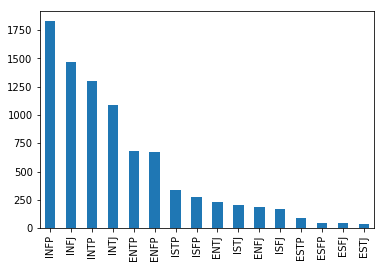

In [34]:
import matplotlib.pyplot as plt

type_count.plot.bar(x='type')
plt.show()

The description of the dataset is that each entry in 'posts' column countains multiple comments seperated by '|||' characters. The conventions of datascience stipulate that we seperate rows into one distinct instance of data, so I will seperate each entry into a seperate row.

In [120]:
#to make filling in the type column easier when the entries are stacked, set the type as the index
mbti_df = mbti_df.set_index('type')

#split the entries by the '|||\ delimiter. note that each pipe character must be enclosed in [] do have it evaluated literally
mbti_df = mbti_df.posts.str.split('[|][|][|]', expand=True).stack()

#reset index, setting level=0 to unstack only the type since it's a multilevel index
mbti_df = mbti_df.reset_index(level=0)

#rename columns. idk why they were set to intergers. 
mbti_df = mbti_df.rename(columns = {0:'posts'})

mbti_df.head(10)

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw
1,INFJ,http://41.media.tumblr.com/tumblr_lfouy03PMA1q...
2,INFJ,enfp and intj moments https://www.youtube.com...
3,INFJ,What has been the most life-changing experienc...
4,INFJ,http://www.youtube.com/watch?v=vXZeYwwRDw8 h...
5,INFJ,May the PerC Experience immerse you.
6,INFJ,The last thing my INFJ friend posted on his fa...
7,INFJ,Hello ENFJ7. Sorry to hear of your distress. I...
8,INFJ,84389 84390 http://wallpaperpassion.com/uplo...
9,INFJ,Welcome and stuff.


In [121]:
#check total entries for each personality type we have now
type_count = d.type.value_counts()
print(type_count)


INFP    89796
INFJ    72105
INTP    63359
INTJ    52471
ENTP    33761
ENFP    32769
ISTP    16498
ISFP    13000
ENTJ    11273
ISTJ     9913
ENFJ     9288
ISFJ     8121
ESTP     4337
ESFP     2215
ESFJ     2018
ESTJ     1921
Name: type, dtype: int64
